### Open and Reproducible researh Computing (Fall 2021)
### Assignment 1
By:
Name: Motasem Abualqumboz
E-mail: motasem.abualqumboz@usu.edu / mabualqumboz@gmail.com

Name of the river: The Big Wood River at Hailey

In [1]:
# Block (1): Install the nwis library
!pip install nwis                        # Here we install the library nwis

In [2]:
# Block (2): Install the required libraries
import numpy as np                               # import the numpy library as np
import pandas as pd                              # import the pandas library as pd
import matplotlib.pyplot as plt                  # import the matplotlib.pyplot as plt
from nwis import Nwis                            # import the Nwis library from nwis library (refer to Block 1)

output_pkl_file = 'streamflow_data_'

In [3]:
# Block (3): List of USGS stream gages
Site_id_1 = '13185000'                   # Site Id for Boise River at Twin Springs
Site_id_2 = '13139510'                   # Site Id for Big Wood River at Hailey
Site_id_3 = '13246000'                   # Site Id for North Fork of the Payette near Banks
Site_id_4 = '13042500'                   # Site Id for Henry's Fork Near Usland Park
Site_id_5 = '06752260'                   # Site Id for Cache La Poudre River near Fort Collins (CO)
Site_id_6 = '09085000'                   # Site Id for Roaring fork River at Glenwood Springs (CO)

Site_id = Site_id_2
Name = "Big Wood River at Hailey"


In [4]:
# Block (4): The start and end time
StartDate = '1970-10-01'
EndDate = '2020-09-30'

In [5]:
# Block (5): List of USGS stream gages
nwis_data = Nwis()
ds = nwis_data.get_data(site=Site_id, start_date=StartDate , end_date=EndDate, data_type='dv')          # Get the data from the Nwis library, dv = daily values 
ds

<xarray.Dataset>
Dimensions:   (datetime: 18262)
Coordinates:
  * datetime  (datetime) datetime64[ns] 1970-10-01 1970-10-02 ... 2020-09-30
Data variables:
    00010     (datetime) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    00060     (datetime) float64 254.0 254.0 254.0 245.0 ... 121.0 121.0 119.0
Attributes:
    site_name:         BIG WOOD RIVER AT HAILEY ID TOTAL FLOW
    site_code:         13139510
    site_latitude:     43.5172222
    site_longitude:    -114.3216667
    site_altitude:     5298.73
    site_coord_datum:  NAD83

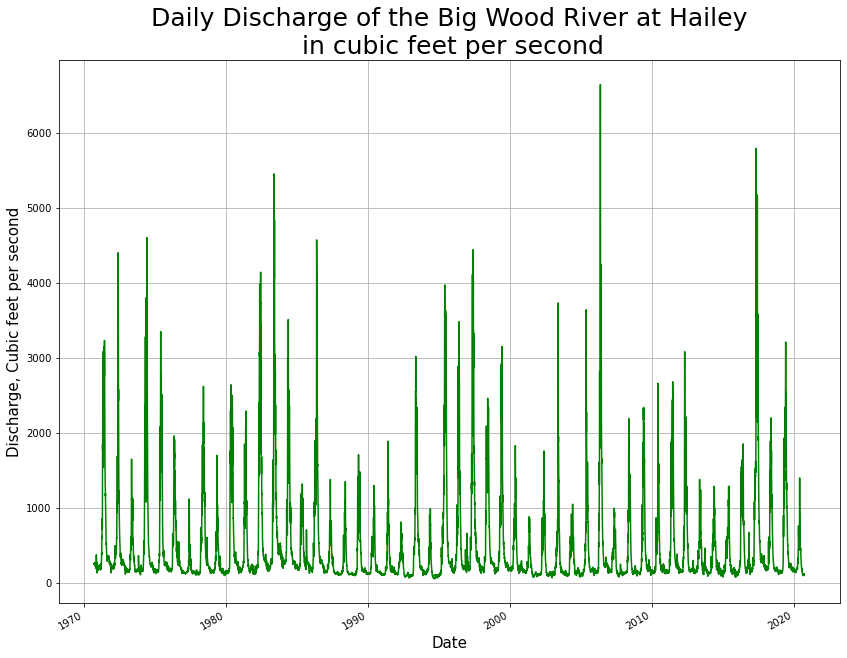

In [6]:
# BLock (6)
ds['00060'].plot(x='datetime', figsize = (14,10), color = "green")
plt.rcParams['figure.figsize'] = (14,10)                             # Update the figure size for all coming figures
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Discharge, Cubic feet per second', fontsize =15)
plt.title('Daily Discharge of the Big Wood River at Hailey\n in cubic feet per second', fontsize = 25)
plt.grid()


<font color = "red">
The gragh above cleary shows that the daily discharge of the Big Wood River at Hailey had a fluctuating trend over the period between 10-01-1970 and 09-30-2020. Its beleived that the Big Wood River is a snow-melt driven system, which mean that the daily discharge increase durig summer time due to snow melt that is normally occur due to increased levels of temperature in the summer. <font>
    


In [7]:
# Get the dates and convert them to a Pandas datetime object
dates = ds['datetime'].values
dates = pd.DatetimeIndex(dates) 

# Get the streamflow in ft^3/s as a numerical array and create one that is the same values but in m^3/s
Q_cfs = ds['00060'].values
Q_cms = Q_cfs / (3.2808**3)

# Create a water year vector by getting the year for every streamflow observation, checking the 
# associated month of that observation and then – if that month is October (10) or onward – add
# 1 to the water year
WY = ds['datetime.year'].values
WY[dates.month>=10] += 1

# Create a pandas DataFrame from these variables
df = pd.DataFrame()
df['Dates'] = dates
df['WaterYear'] = WY
df['Discharge_cfs'] = Q_cfs
df['Discharge_cms'] = Q_cms

# Rebuild the index to be able to use the pd.DataFrame.groupby() method
df.index = pd.to_datetime(df['Dates'],'%y-%m-%d')

# Save to a pickle file
# Question: What's going on with the file name? 
df.to_pickle(output_pkl_file+Site_id+'.pkl')
df


,Dates,WaterYear,Discharge_cfs,Discharge_cms
Dates,,,,
1970-10-01,1970-10-01,1971,254.0,7.192741
1970-10-02,1970-10-02,1971,254.0,7.192741
1970-10-03,1970-10-03,1971,254.0,7.192741
1970-10-04,1970-10-04,1971,245.0,6.937881
1970-10-05,1970-10-05,1971,245.0,6.937881
...,...,...,...,...
2020-09-26,2020-09-26,2020,117.0,3.313192
2020-09-27,2020-09-27,2020,121.0,3.426463
2020-09-28,2020-09-28,2020,121.0,3.426463


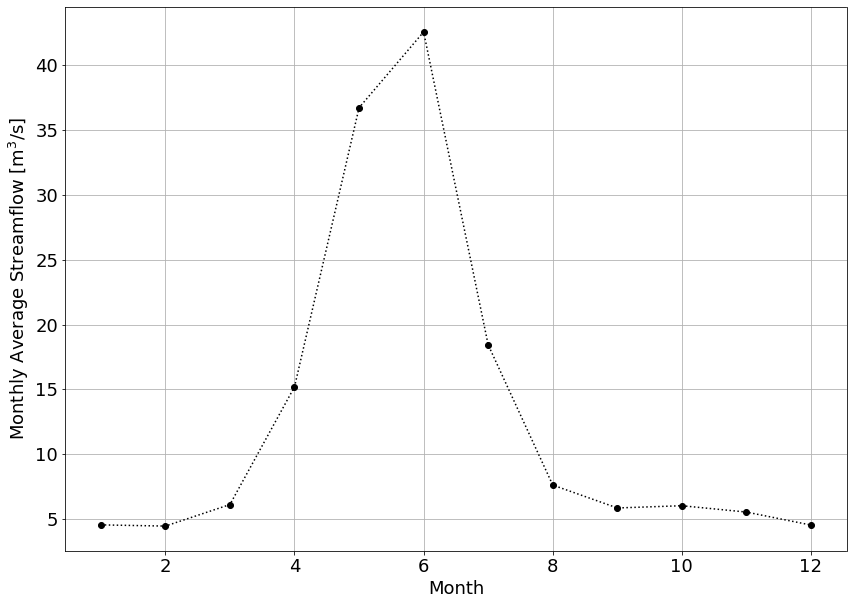

In [8]:
q_seasonal = df['Discharge_cms'].groupby(by=df.index.month).mean().values

plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18}) # Increase the font size
plt.plot((np.arange(q_seasonal.size)+1),q_seasonal,'ko:')
plt.xlabel('Month')
plt.ylabel('Monthly Average Streamflow [m${}^3$/s]')
plt.grid()
plt.show()

<font color = "red">
The gragh above supports what had mentioned before that the Big Wood River is snow-melt driven system. The monthly average streamflow graph cleary shows that the streamflow levels do not increase until the snow begins to melt in April due to increased levels of temperature in the summer. <font>
    


In [9]:
Q_ams = df.groupby(by=df['WaterYear']).max()
Q_ams

,Dates,Discharge_cfs,Discharge_cms
WaterYear,,,
1971,1971-09-30,3230.0,91.466751
1972,1972-09-30,4400.0,124.598670
1973,1973-09-30,1650.0,46.724501
1974,1974-09-30,4600.0,130.262246
1975,1975-09-30,3350.0,94.864897
1976,1976-09-30,1960.0,55.503044
1977,1977-09-30,1120.0,31.716025
1978,1978-09-30,2620.0,74.192845
1979,1979-09-30,1700.0,48.140395


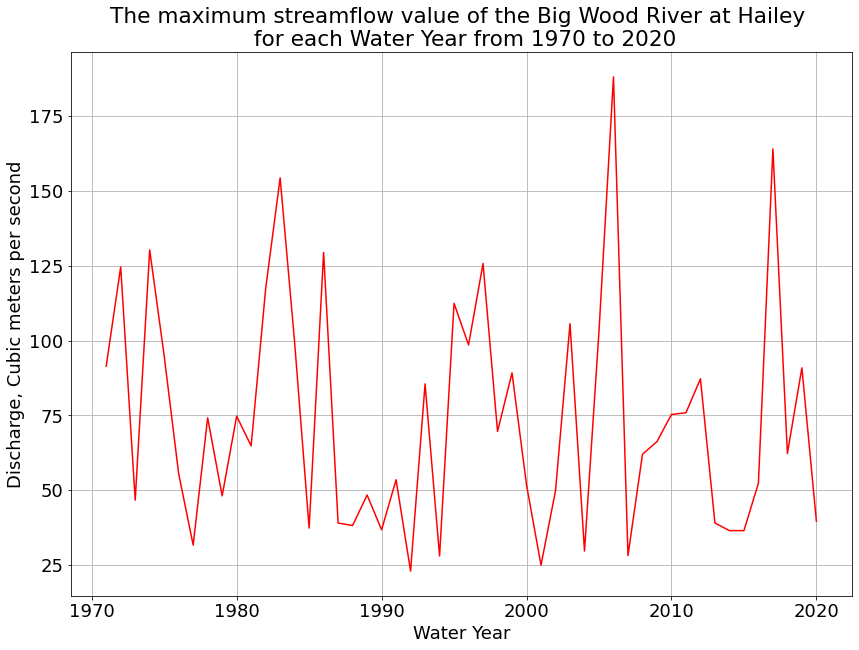

In [10]:
Q_ams['Discharge_cms'].plot(x='WaterYear', color = "red")
plt.xlabel('Water Year')
plt.ylabel('Discharge, Cubic meters per second')
plt.title("The maximum streamflow value of the Big Wood River at Hailey \n for each Water Year from 1970 to 2020")
plt.grid()

<font color = "red">
The gragh above shows that the annual maximum streamflow of the Big Wood River varied over the years from 1970 to 2020. This could be due to many reasons, inlcuding the climate and landuse change. The graph below highlights the lowest five and highest five annual maximum streamflows. <font>
    


In [11]:
df_1971 = df[df['WaterYear'] ==1971]
df_1971
df_1971.max()


Dates            1971-09-30 00:00:00
WaterYear                       1971
Discharge_cfs                 3230.0
Discharge_cms              91.466751
dtype: object

In [12]:
Q_ams_sort=Q_ams.Discharge_cms.sort_values(ascending=False)
Q_ams_sort

WaterYear
2006    188.030721
2017    163.960523
1983    154.332444
1974    130.262246
1986    129.412710
1997    125.731385
1972    124.598670
1982    117.236022
1995    112.421982
2003    105.625691
2005    103.077082
1984     99.395757
1996     98.546221
1975     94.864897
1971     91.466751
2019     90.900394
1999     89.201321
2012     87.219069
1993     85.519996
2011     75.891917
2010     75.325560
1980     74.759202
1978     74.192845
1998     69.661984
2009     66.263838
1981     64.847944
2018     62.299335
2008     62.016156
1976     55.503044
1991     53.520792
2016     52.388077
2000     51.821720
2002     49.839468
1989     48.423574
1979     48.140395
1973     46.724501
2020     39.645031
1987     39.078674
2013     39.078674
1988     38.229137
1985     37.379601
1990     36.813244
2014     36.530065
2015     36.530065
1977     31.716025
2004     29.733774
2007     28.204608
1994     28.063019
2001     25.004688
1992     23.022436
Name: Discharge_cms, dtype: float64

In [13]:
df=pd.DataFrame(Q_ams_sort)
df

,Discharge_cms
WaterYear,
2006,188.030721
2017,163.960523
1983,154.332444
1974,130.262246
1986,129.412710
1997,125.731385
1972,124.598670
1982,117.236022
1995,112.421982


In [14]:
Rank=np.arange(50)+1
df['Rank'] = Rank
df

,Discharge_cms,Rank
WaterYear,,
2006,188.030721,1
2017,163.960523,2
1983,154.332444,3
1974,130.262246,4
1986,129.412710,5
1997,125.731385,6
1972,124.598670,7
1982,117.236022,8
1995,112.421982,9


In [15]:
FiveMax = df.head(5)
FiveMin = df.tail(5)

print("The lowest five annual maximum streamflows are: ")
print()
print(FiveMin['Discharge_cms'])

print()
print()
print()

print("The highest five annual maximum streamflows are: ")
print()
print(FiveMax['Discharge_cms'])

The lowest five annual maximum streamflows are: 

WaterYear
2004    29.733774
2007    28.204608
1994    28.063019
2001    25.004688
1992    23.022436
Name: Discharge_cms, dtype: float64



The highest five annual maximum streamflows are: 

WaterYear
2006    188.030721
2017    163.960523
1983    154.332444
1974    130.262246
1986    129.412710
Name: Discharge_cms, dtype: float64


<font color = "red">
    From the previous cells, the lowest five annual maximum streamflows of 29.73, 28.20, 28.06, 25.0 and 23.02 cubic meters per second were recorded in 2004, 2007, 1994, 2001 and 1992, respectively. The highest five annual maximum streamflows of 188.03,163.96, 154.33, 130.26 and 129.41 cubic meters per second were recorded in 2006, 2017, 1983, 1974 and 1986, respectively.
    The gragh below visually present the lowest five (blue dimonds) and highest five (black circles) annual maximum streamflows of the Big Wood River varied over the years from 1970 to 2020. <font>
    

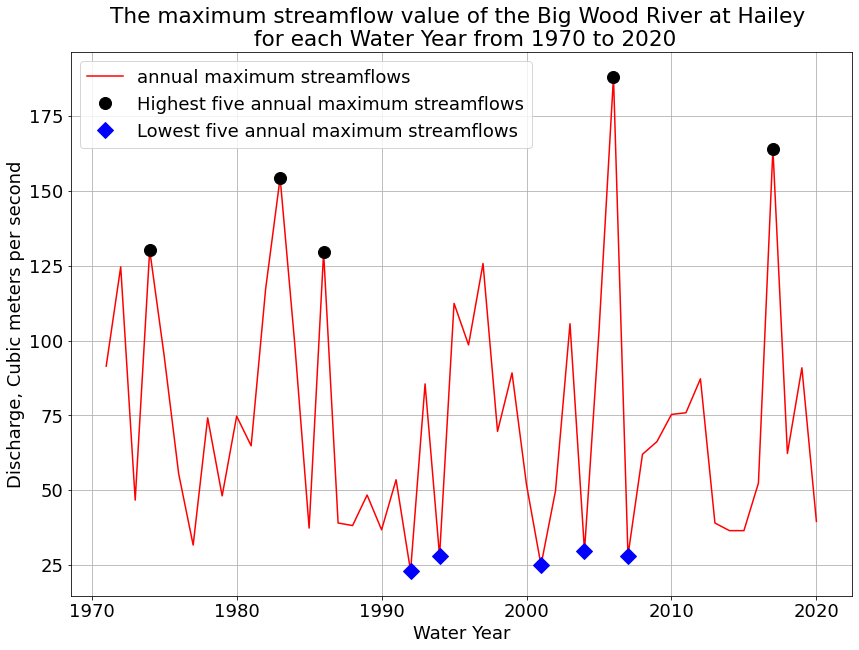

In [16]:
Q_ams['Discharge_cms'].plot(x='WaterYear', color = "red", label = 'annual maximum streamflows' )
plt.plot(FiveMax['Discharge_cms'], 'ko', label='Highest five annual maximum streamflows', markersize=12)
plt.plot(FiveMin['Discharge_cms'], 'bD',label='Lowest five annual maximum streamflows',markersize=12)
plt.legend()
plt.xlabel('Water Year')
plt.ylabel('Discharge, Cubic meters per second')
plt.title("The maximum streamflow value of the Big Wood River at Hailey \n for each Water Year from 1970 to 2020")
plt.grid()

In [65]:
n = np.size(Q_ams_sort)
nPlusOne=n+1
nPlusOne

df['nPlusOne'] = nPlusOne
df['Probability of Exceedance']=df['Rank']/df['nPlusOne']
df['Recurrence Interval, Year']=1/df['Probability of Exceedance']

df

,Discharge_cms,Rank,nPlusOne,Probability of Exceedance,"Recurrence Interval, Year"
WaterYear,,,,,
2006,188.030721,1,51,0.019608,51.000000
2017,163.960523,2,51,0.039216,25.500000
1983,154.332444,3,51,0.058824,17.000000
1974,130.262246,4,51,0.078431,12.750000
1986,129.412710,5,51,0.098039,10.200000
1997,125.731385,6,51,0.117647,8.500000
1972,124.598670,7,51,0.137255,7.285714
1982,117.236022,8,51,0.156863,6.375000
1995,112.421982,9,51,0.176471,5.666667


Text(0.5, 0, 'Annual Maximum Flow $[m^3/s]$')

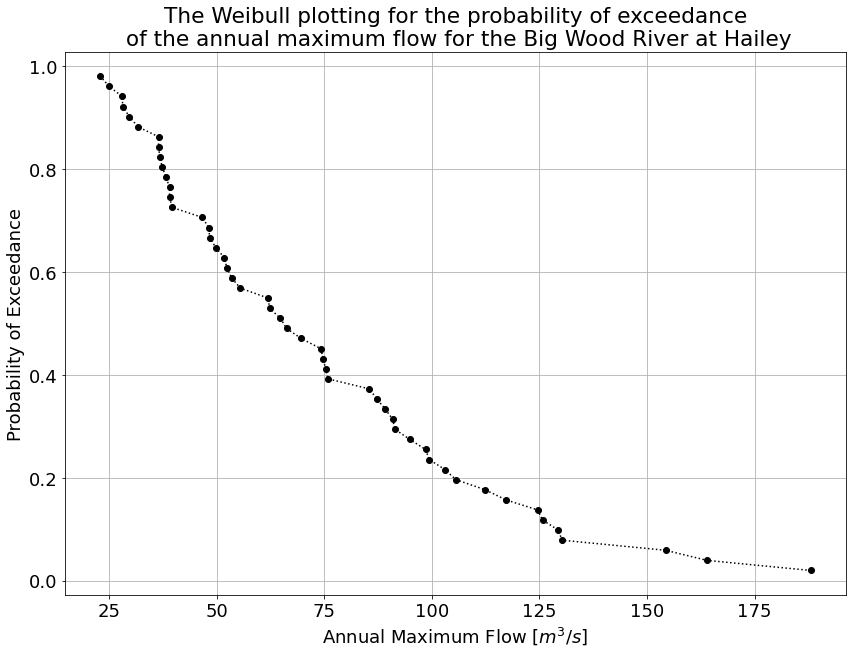

In [67]:
plt.plot(df['Discharge_cms'] ,df['Probability of Exceedance'],'ko:')
plt.grid()
plt.ylabel('Probability of Exceedance')
plt.title("The Weibull plotting for the probability of exceedance\n of the annual maximum flow for the " +str(Name))
plt.xlabel('Annual Maximum Flow, cubic meter per second')
plt.xlabel("Annual Maximum Flow"+r" $[m^3/s]$")


In [38]:
P20 = 1/20
P50 = 1/50

Q20 =np.interp(P20,df['Probability of Exceedance'],df['Discharge_cms'])
Q50 =np.interp(P50,df['Probability of Exceedance'],df['Discharge_cms'])

print('The 20-year flood event has a magnitude of {:.3f} m^3/s'.format(Q20))
print('The 50-year flood event has a magnitude of {:.3f} m^3/s'.format(Q50))

The 20-year flood event has a magnitude of 158.665 m^3/s
The 50-year flood event has a magnitude of 187.549 m^3/s


<font color = "red">
    The Weibull plotting presented above cleary shows that the lowest annual maximum streamflow values have high probability of exceedance as compared with the highest annaul maximum streamflow values that have lower probability of exceedance. The 20-year and 50-year flood event has a magnitude of 158.665 m^3/s and 158.665 m^3/s, respectively. The 20-year flood event that has a magnitude of 158.665 m^3/s is estimated to be seen every 20 years.
    The graph below present both the probability of exceedance and the Recurrence Interval.
    <font>
    

Text(0.5, 1.0, 'The Weibull plotting for the probability of exceedance and Recurrence Interval\n of the annual maximum flow for the Big Wood River at Hailey')

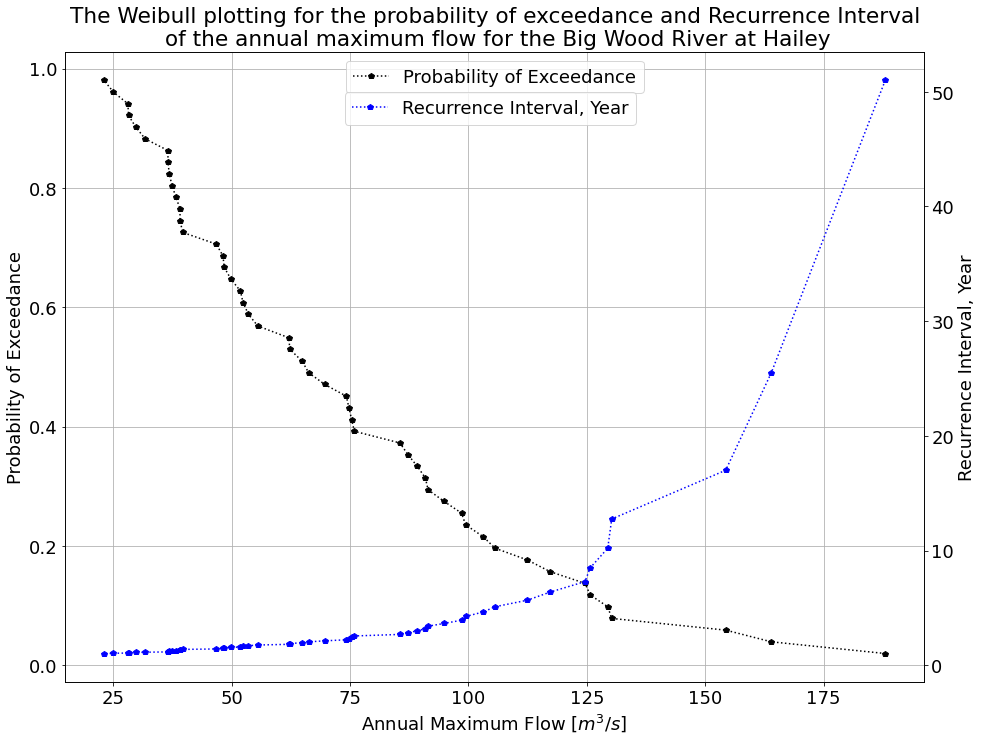

In [68]:
fig,ax1=plt.subplots()
ax1.set_xlabel('Annual Maximum Flow $[m^3/s]$')
ax1.set_ylabel('Probability of Exceedance')
ax1.plot(df['Discharge_cms'], df['Probability of Exceedance'], 'kp:')
plt.grid()
plt.legend(["Probability of Exceedance"], loc='upper center')

ax2=ax1.twinx()
ax2.set_ylabel('Recurrence Interval, Year')
ax2.plot(df['Discharge_cms'], df['Recurrence Interval, Year'], 'bp:')
fig.tight_layout()
plt.legend(["Recurrence Interval, Year"], bbox_to_anchor = (0.675,0.95))

plt.title("The Weibull plotting for the probability of exceedance and Recurrence Interval\n of the annual maximum flow for the " +str(Name))
